In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from PreproccesingAlatt import X, y

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
param_grid = {
    'max_features': ['sqrt', 'log2', 1.0],
    'min_samples_leaf': [1, 2, 3, 7, 11],
    'n_estimators': [45, 70, 75, 80, 85, 90],
    'oob_score': [True, False],
    'max_depth': [None, 10, 20, 30],
    'max_leaf_nodes': [None, 10, 50, 100]
}

# param_grid = {
#     'max_features' : ['sqrt', 'log2', 1.0],
#     'min_samples_leaf' : [1, 2, 3, 7, 11],
#     'n_estimators': [45, 70, 75,80,85,90,100],
#     'oob_score': [True, False],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'max_leaf_nodes': [None, 10, 50, 100],
#     'min_impurity_decrease': [0.0, 0.1, 0.2],
#     'bootstrap': [True, False],
#     'warm_start': [True, False]
# }

model = ExtraTreesRegressor(random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = ExtraTreesRegressor(random_state=0, **best_params)
best_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
4320 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4320 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/loc

ExtraTreesRegressor(max_depth=10, n_estimators=85, random_state=0)

In [3]:
params = {'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'n_estimators': 85, 'oob_score': False}
best_model = ExtraTreesRegressor(random_state=0, **params)
best_model.fit(X_train, y_train)

/home/laxman/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesRegressor(max_depth=10, n_estimators=85, random_state=0)

In [4]:
predictions = best_model.predict(X_test)

In [6]:
# print("best parameters:",best_params)
print("R^2 score:", r2_score(y_test, predictions))
print("mse:", mean_squared_error(y_test, predictions))
print("mae:", mean_absolute_error(y_test, predictions))

R^2 score: 0.9969885206299731
mse: 0.0036685760570193894
mae: 0.03896510868724483


In [6]:
import pickle

In [7]:
with open("ExtraTreesAlat.pkl", "wb") as f:
  pickle.dump(best_model, f)

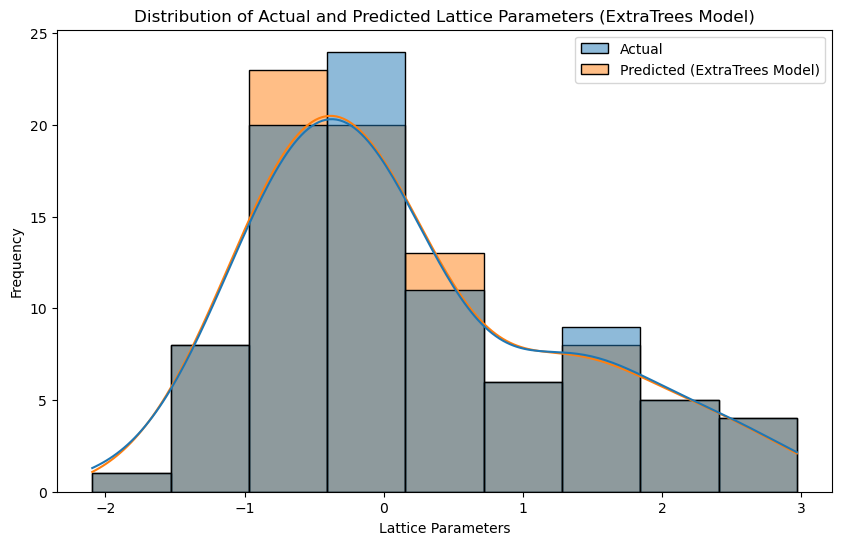

In [10]:
y_test_values = y_test.values.ravel()  
predictions_values = predictions.ravel()  
df = pd.DataFrame({'Actual': y_test_values, 'Predicted (ExtraTrees Model)': predictions_values})

plt.figure(figsize=(10, 6))
sns.histplot(data=df, kde=True)
plt.xlabel('Lattice Parameters')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted Lattice Parameters (ExtraTrees Model)')
plt.savefig("DistplotstackedAlat_ExtraTrees.png", dpi=600)
plt.show()

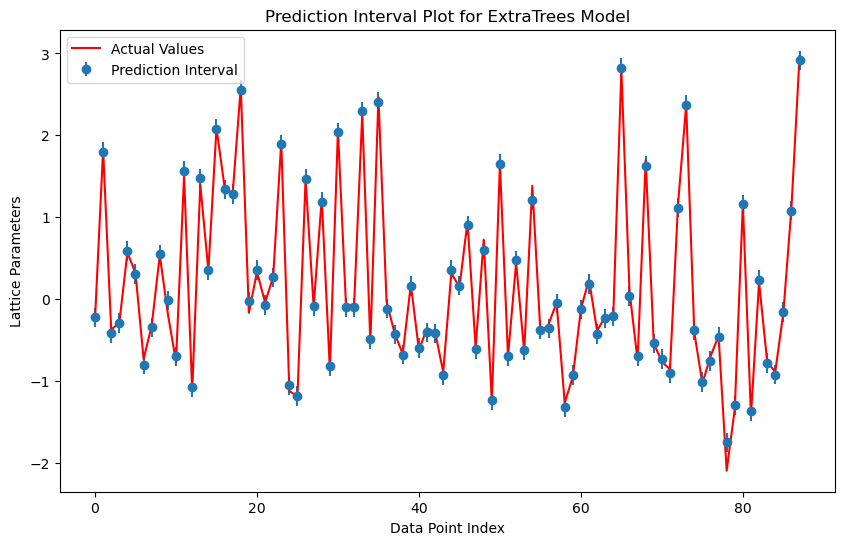

In [12]:
y_test_reshaped = np.squeeze(y_test)
residuals_ExtraTrees = y_test_reshaped - predictions
residuals_model = residuals_ExtraTrees.values
prediction_interval = 1.96 * np.std(residuals_model)  # Assuming a 95% prediction interval

plt.figure(figsize=(10, 6))
plt.errorbar(range(len(y_test_reshaped)), predictions, yerr=prediction_interval, fmt='o', label='Prediction Interval')
plt.plot(range(len(y_test_reshaped)), y_test_reshaped, 'r-', label='Actual Values')
plt.xlabel('Data Point Index')
plt.ylabel('Lattice Parameters')
plt.title('Prediction Interval Plot for ExtraTrees Model')
plt.legend()
# plt.grid(True)
plt.savefig("PredictionIntervalStackedAlat_ExtraaTrees.png",dpi=600)
plt.show()

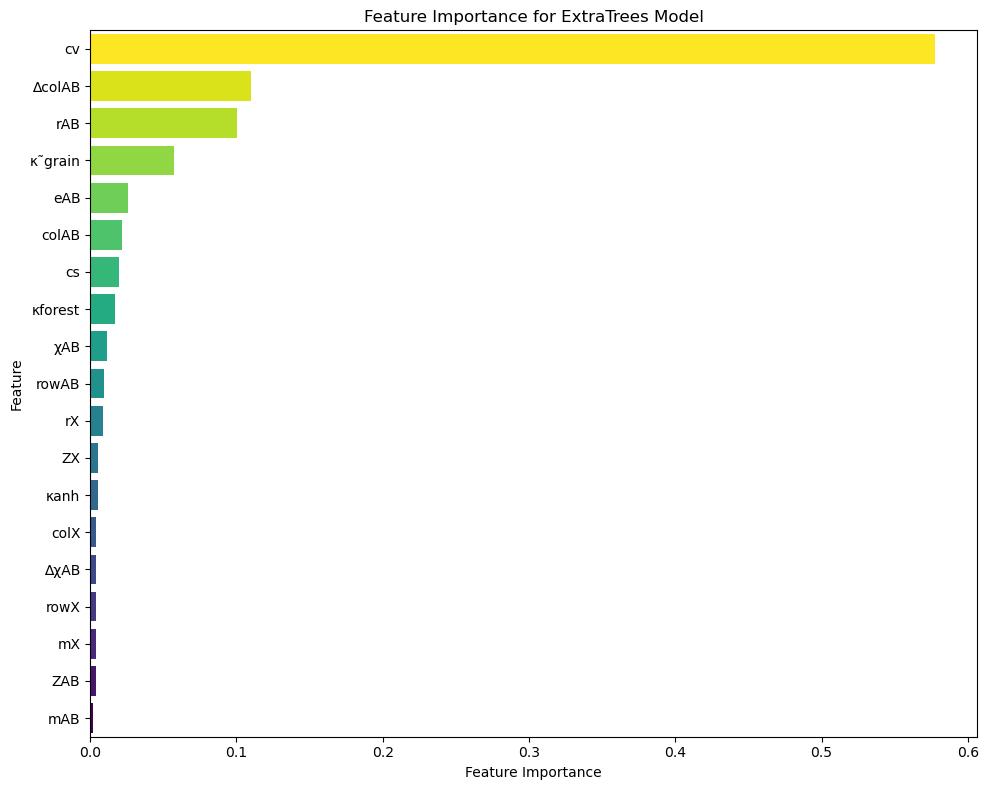

In [21]:
feature_importance = best_model.feature_importances_
feature_names = X_train.columns 
non_zero_indices = np.where(feature_importance > 0.0018)[0]
non_zero_feature_importance = feature_importance[non_zero_indices]
non_zero_feature_names = feature_names[non_zero_indices]
sorted_idx = np.argsort(non_zero_feature_importance)
num_features = len(non_zero_feature_importance)
colors = plt.cm.viridis(np.linspace(0, 1, num_features))  

plt.figure(figsize=(10, 8))
plt.barh(range(num_features), non_zero_feature_importance[sorted_idx], align='center', color=colors)
plt.yticks(range(num_features), non_zero_feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for ExtraTrees Model')
plt.tight_layout()
plt.ylim(-0.5, num_features - 0.5)
plt.savefig('FeatureImpAlat_ExtraTrees.png',dpi=600)
plt.show()